In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#plt.style.use('seaborn')

sns.set(style="ticks", color_codes=True)

In [2]:
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


### Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

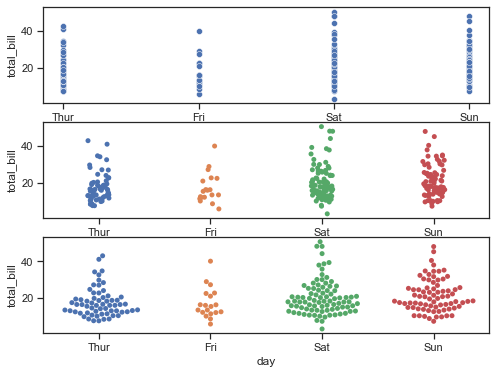

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.scatterplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.stripplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.swarmplot(data=tips, x="day", y="total_bill", ax=axes[2])

### Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

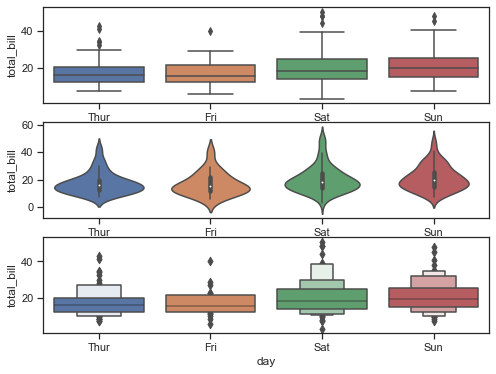

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.violinplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.boxenplot(data=tips, x="day", y="total_bill", ax=axes[2])

### Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

<AxesSubplot:xlabel='day', ylabel='count'>

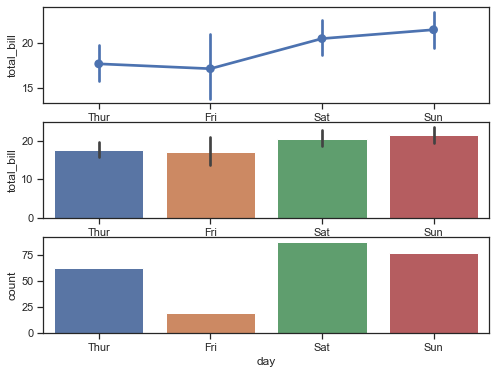

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.pointplot(data=tips, x="day", y="total_bill", ax=axes[0])
sns.barplot(data=tips, x="day", y="total_bill", ax=axes[1])
sns.countplot(data=tips, x="day", ax=axes[2])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

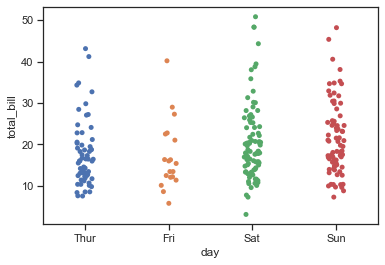

In [6]:
sns.stripplot(data=tips, x="day", y="total_bill")

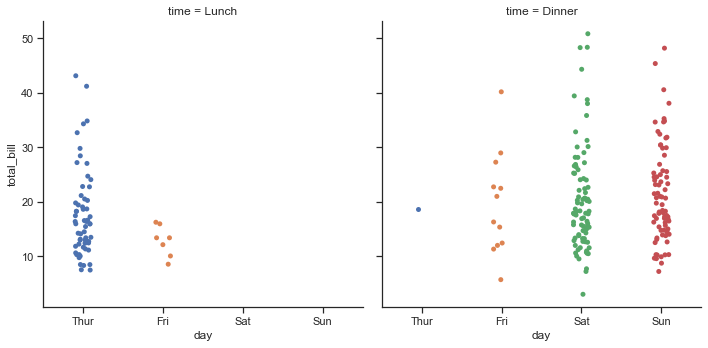

In [7]:
sns.catplot(data=tips, x="day", y="total_bill", col="time")

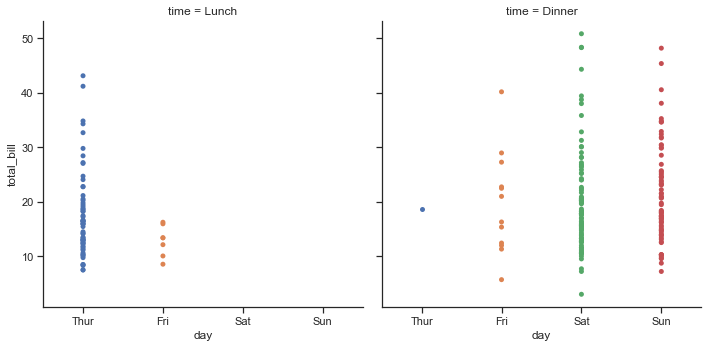

In [8]:
sns.catplot(data=tips, x="day", y="total_bill", col="time", jitter=False)

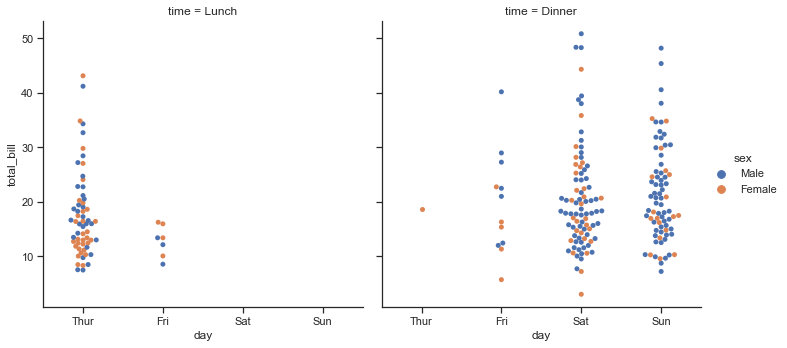

In [9]:
sns.catplot(data=tips, x="day", y="total_bill", col="time", kind="swarm", hue="sex")

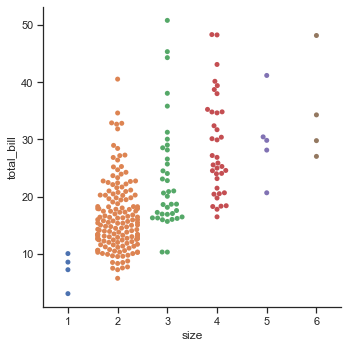

In [10]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips)

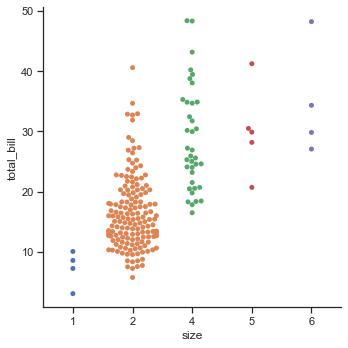

In [11]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"))

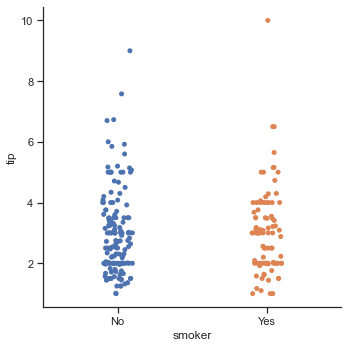

In [12]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

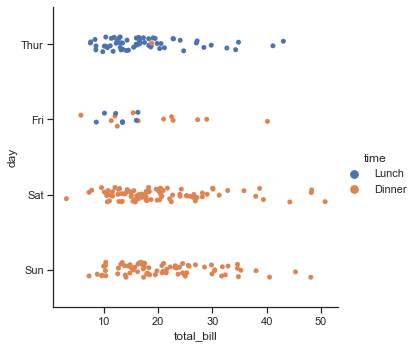

In [13]:
sns.catplot(x="total_bill", y="day", hue="time", data=tips)

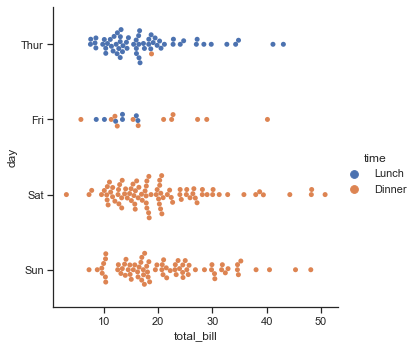

In [14]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## Distributions of observations within categories

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png">

이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### 같은 통계값을 갖는 데이터의 다른 그래프
[The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

In [15]:
group = tips.groupby(["day"])["total_bill"].describe()
group

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [16]:
Thur = group.loc["Thur"]
Thur

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: Thur, dtype: float64

In [17]:
IQR = Thur["75%"] - Thur["25%"]
Thur_min = Thur["25%"] - (1.5 * IQR)
Thur_max = Thur["75%"] + (1.5 * IQR)
IQR, Thur_min, Thur_max

(7.712500000000002, 0.8737499999999958, 31.723750000000003)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

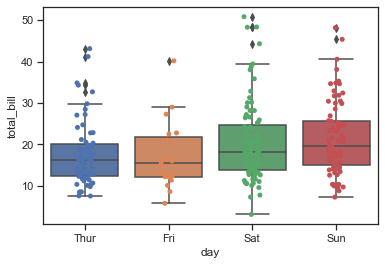

In [18]:
sns.stripplot(x="day", y="total_bill", data=tips)
sns.boxplot(x="day", y="total_bill", data=tips)

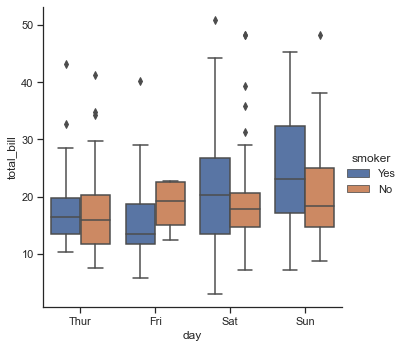

In [19]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

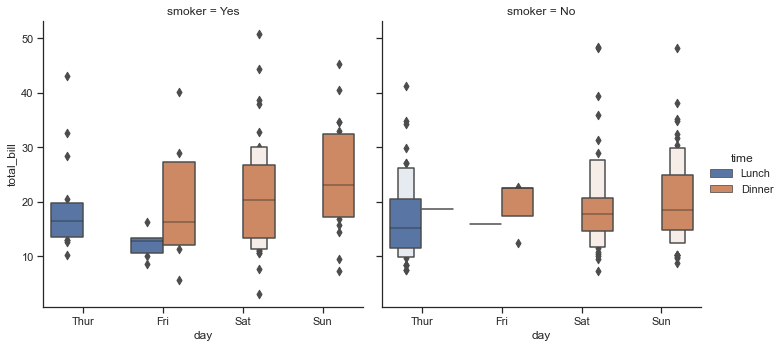

In [20]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips, col="smoker",  hue="time")

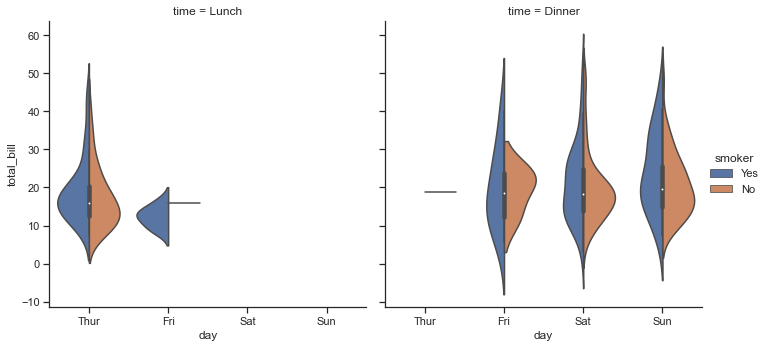

In [21]:
sns.catplot(x="day", y="total_bill", kind="violin", 
            data=tips, col="time", hue="smoker", split=True)

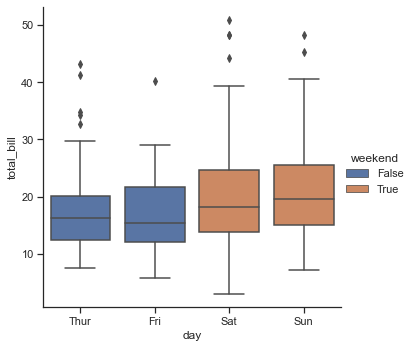

In [22]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

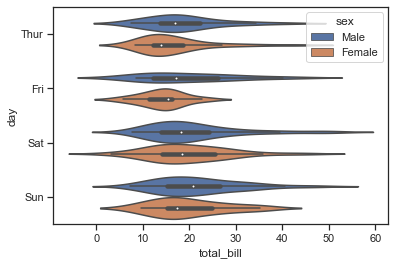

In [23]:
sns.violinplot(x="total_bill", y="day", hue="sex",
            data=tips)

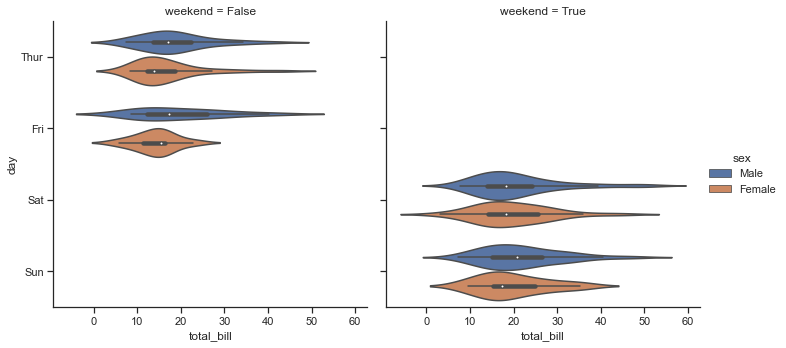

In [24]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips, col="weekend")

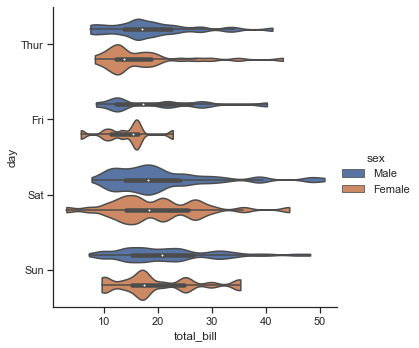

In [25]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

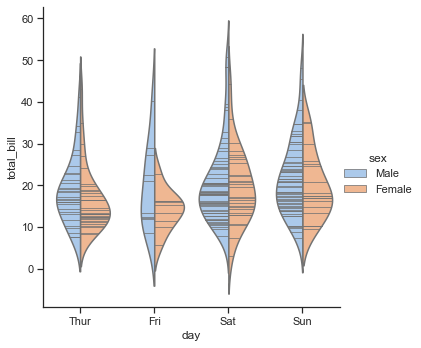

In [26]:
sns.catplot(x="day", y="total_bill", hue="sex",  inner="stick", palette="pastel",
            kind="violin", split=True, data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

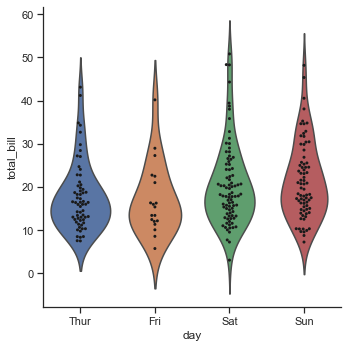

In [27]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

## Statistical estimation within categories

In [28]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic_group = titanic.groupby(["sex", "class"])["survived"].mean()
titanic_group = titanic_group.unstack()
titanic_group

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

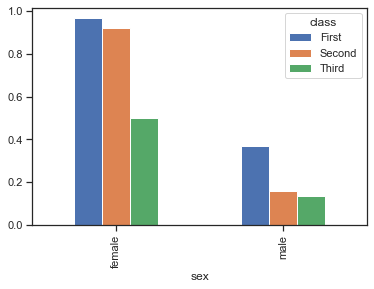

In [30]:
titanic_group.plot.bar()

<AxesSubplot:xlabel='sex', ylabel='survived'>

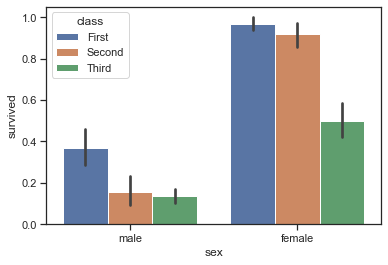

In [31]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

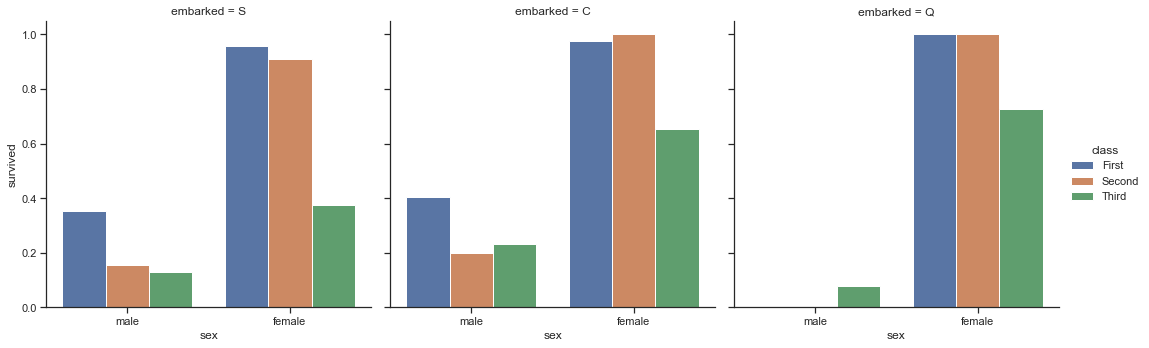

In [32]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            data=titanic, col="embarked", ci=None)

<AxesSubplot:>

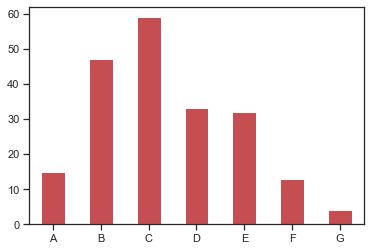

In [33]:
titanic["deck"].value_counts().sort_index().plot.bar(rot=0, color="r")

<AxesSubplot:xlabel='count', ylabel='deck'>

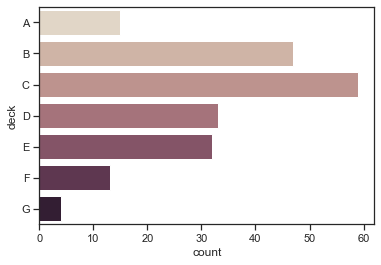

In [34]:
sns.countplot(y="deck", data=titanic, palette="ch:.25")

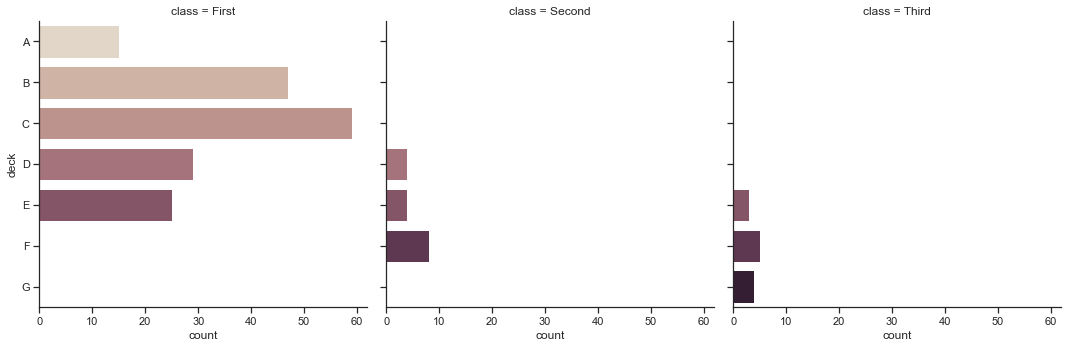

In [35]:
sns.catplot(y="deck", kind="count", palette="ch:.25", data=titanic, col="class")

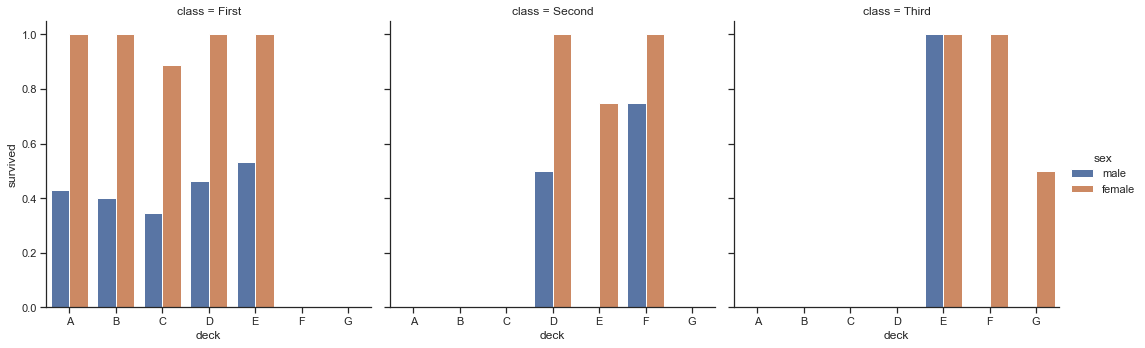

In [36]:
sns.catplot(x="deck", y="survived", kind="bar", hue="sex",
            data=titanic, col="class", ci=None)

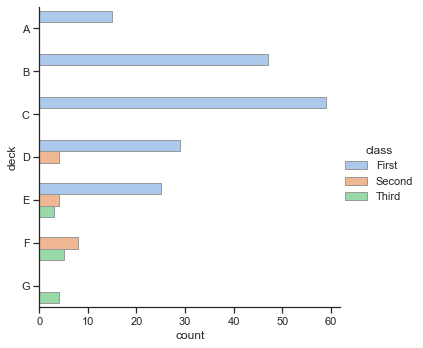

In [37]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

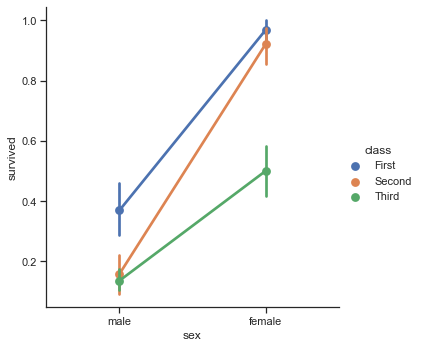

In [38]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

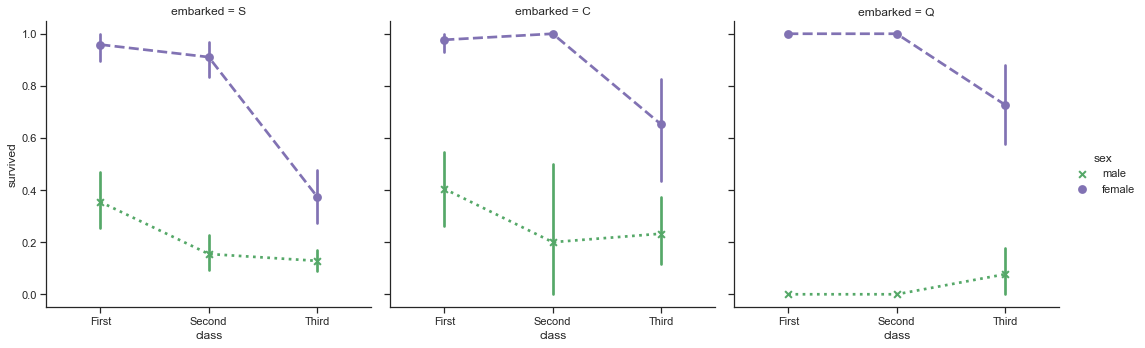

In [39]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["x", "o"], linestyles=[":", "--"],
            kind="point", data=titanic, col="embarked");

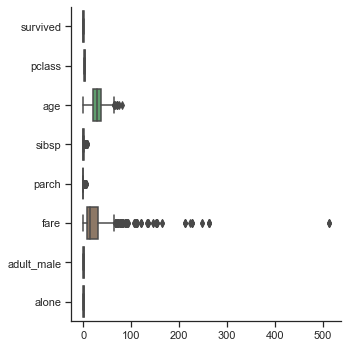

In [40]:
sns.catplot(data=titanic, orient="h", kind="box")

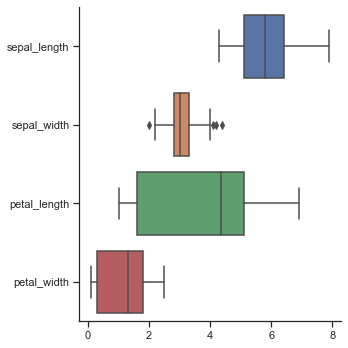

In [41]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

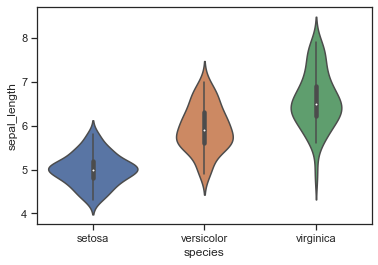

In [42]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

<AxesSubplot:xlabel='count', ylabel='deck'>

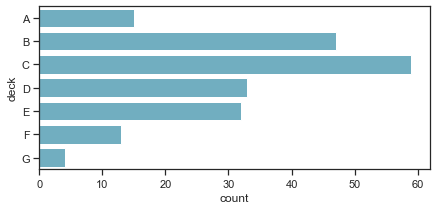

In [43]:
# f, ax = plt.subplots(figsize=(7, 3))
plt.figure(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

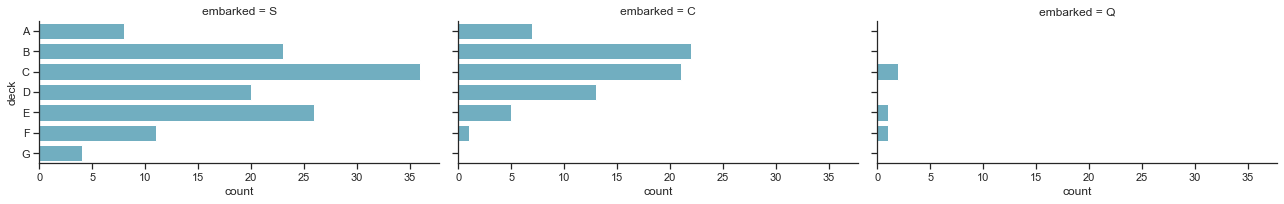

In [44]:
# f, ax = plt.subplots(figsize=(7, 3))
sns.catplot(y="deck", data=titanic, kind="count", color="c", height=3,
    aspect=2, col="embarked")

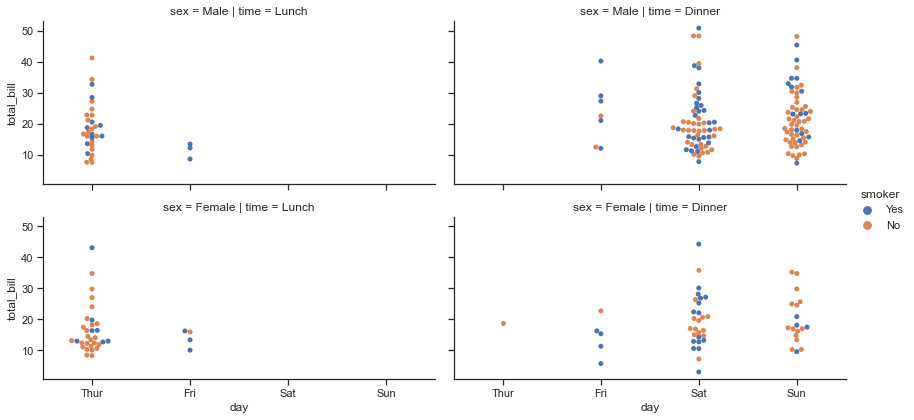

In [45]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", row="sex", aspect=2, height=3,
            kind="swarm", data=tips)

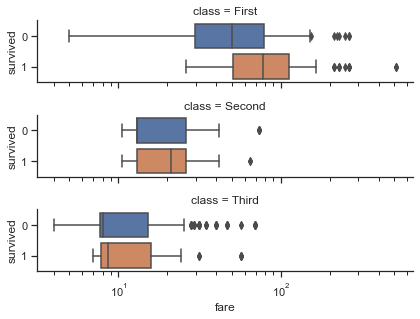

In [46]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")